In [ ]:
Problem 1

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142858


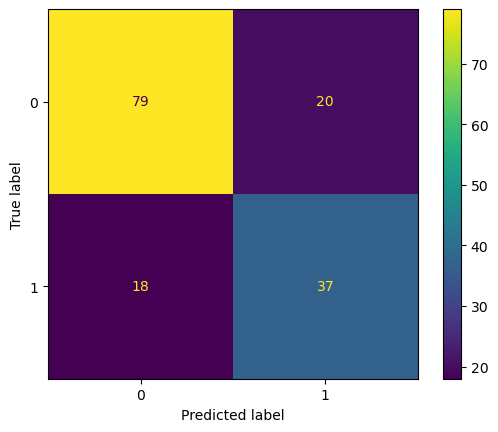

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

dbtsData = pd.read_csv('diabetes.csv')

X = dbtsData.drop(columns=['Outcome'])
y = dbtsData['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logReg = LogisticRegression()
logReg.fit(X_train_scaled, y_train)

y_pred = logReg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

ConfusionMatrixDisplay.from_estimator(logReg, X_test_scaled, y_test)
plt.show()


In [ ]:
Problem 2

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

cancerData = pd.read_csv('cancer.csv')

cancerData['diagnosis'] = cancerData['diagnosis'].map({'M': 1, 'B': 0})

cancerData = cancerData.drop(columns=['id'])

# Handle any non-numeric data by checking and converting
cancerData = cancerData.apply(pd.to_numeric, errors='coerce')

# Handle NaN values by filling them with the mean of the column
cancerData.fillna(cancerData.mean(), inplace=True)

# Split into features and target
X = cancerData.drop(columns=['diagnosis'])
y = cancerData['diagnosis']

# Check if there are any NaN values left in X
nan_columns = X.columns[X.isna().any()].tolist()
if nan_columns:
    print(f"Warning: NaN values found in columns: {nan_columns}. Please handle these appropriately.")

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check for NaN values in the scaled datasets
if np.isnan(X_train_scaled).any() or np.isnan(X_test_scaled).any():
    raise ValueError("NaN values found in scaled data. Please check your preprocessing steps.")

# Train the logistic regression model without regularization
logReg = LogisticRegression()
logReg.fit(X_train_scaled, y_train)

# Evaluate the model without regularization
y_pred = logReg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results without regularization
print("Without Regularization:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot confusion matrix without regularization
ConfusionMatrixDisplay.from_estimator(logReg, X_test_scaled, y_test)
plt.show()

# Train the logistic regression model with regularization
logRegReg = LogisticRegression(penalty='l2', C=1.0)
logRegReg.fit(X_train_scaled, y_train)

# Evaluate the model with regularization
y_pred_reg = logRegReg.predict(X_test_scaled)
accuracy_reg = accuracy_score(y_test, y_pred_reg)
precision_reg = precision_score(y_test, y_pred_reg)
recall_reg = recall_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)
conf_matrix_reg = confusion_matrix(y_test, y_pred_reg)

# Print results with regularization
print("With Regularization:")
print(f"Accuracy: {accuracy_reg}")
print(f"Precision: {precision_reg}")
print(f"Recall: {recall_reg}")
print(f"F1 Score: {f1_reg}")

# Plot confusion matrix with regularization
ConfusionMatrixDisplay.from_estimator(logRegReg, X_test_scaled, y_test)
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: NaN values found in scaled data. Please check your preprocessing steps.

In [ ]:
Problem 3

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cancerData = pd.read_csv('cancer.csv')

cancerData.drop(columns=['id', 'Unnamed: 32'], inplace=True)

cancerData['diagnosis'] = cancerData['diagnosis'].map({'M': 1, 'B': 0})

cancerData = cancerData.apply(pd.to_numeric, errors='coerce')

cancerData.fillna(cancerData.mean(), inplace=True)

X = cancerData.drop(columns=['diagnosis'])
y = cancerData['diagnosis']

nan_columns = X.columns[X.isna().any()].tolist()
if nan_columns:
    print(f"Warning: NaN values found in columns: {nan_columns}. Please handle these appropriately.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

if np.isnan(X_train_scaled).any() or np.isnan(X_test_scaled).any():
    raise ValueError("NaN values found in scaled data. Please check your preprocessing steps.")

nbModel = GaussianNB()
nbModel.fit(X_train_scaled, y_train)

y_pred_nb = nbModel.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayesian Classifier:")
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

try:
    print("Comparison with Logistic Regression:")
    print(f"Accuracy: {accuracy_penalty} (Logistic Regression) vs {accuracy_nb} (Naive Bayesian)")
    print(f"Precision: {precision_penalty} (Logistic Regression) vs {precision_nb} (Naive Bayesian)")
    print(f"Recall: {recall_penalty} (Logistic Regression) vs {recall_nb} (Naive Bayesian)")
    print(f"F1 Score: {f1_penalty} (Logistic Regression) vs {f1_nb} (Naive Bayesian)")
except NameError:
    print("Logistic Regression results not available for comparison.")


Naive Bayesian Classifier:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
Comparison with Logistic Regression:
Logistic Regression results not available for comparison.


In [ ]:
Problem 4

In [ ]:
from sklearn.decomposition import PCA

# Function to train and evaluate logistic regression with PCA
def train_eval_pca(X_train, y_train, X_test, y_test, K):
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    logReg_pca = LogisticRegression(max_iter=1000)
    logReg_pca.fit(X_train_pca, y_train)
    
    y_pred_pca = logReg_pca.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca)
    recall = recall_score(y_test, y_pred_pca)
    f1 = f1_score(y_test, y_pred_pca)
    
    return accuracy, precision, recall, f1

# Evaluate for different values of K
K_vals = range(1, 31)
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []

for K in K_vals:
    acc, prec, rec, f1 = train_eval_pca(X_train_scaled, y_train, X_test_scaled, y_test, K)
    acc_scores.append(acc)
    prec_scores.append(prec)
    rec_scores.append(rec)
    f1_scores.append(f1)

# Identify the optimum K
opt_K = K_vals[np.argmax(acc_scores)]
print(f"The optimum number of principal components (K) is: {opt_K}")

# Plot the evaluation metrics over different Ks
plt.figure(figsize=(12, 8))
plt.plot(K_vals, acc_scores, label='Accuracy')
plt.plot(K_vals, prec_scores, label='Precision')
plt.plot(K_vals, rec_scores, label='Recall')
plt.plot(K_vals, f1_scores, label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Evaluation Metrics over Different Numbers of Principal Components')
plt.legend()
plt.show()


In [ ]:
Problem 5

In [ ]:
# Function to train and evaluate naive Bayesian with PCA
def train_eval_pca_nb(X_train, y_train, X_test, y_test, K):
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    nbModel_pca = GaussianNB()
    nbModel_pca.fit(X_train_pca, y_train)
    
    y_pred_pca = nbModel_pca.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca)
    recall = recall_score(y_test, y_pred_pca)
    f1 = f1_score(y_test, y_pred_pca)
    
    return accuracy, precision, recall, f1

# Evaluate for different values of K
acc_scores_nb = []
prec_scores_nb = []
rec_scores_nb = []
f1_scores_nb = []

for K in K_vals:
    acc, prec, rec, f1 = train_eval_pca_nb(X_train_scaled, y_train, X_test_scaled, y_test, K)
    acc_scores_nb.append(acc)
    prec_scores_nb.append(prec)
    rec_scores_nb.append(rec)
    f1_scores_nb.append(f1)

# Identify the optimum K
opt_K_nb = K_vals[np.argmax(acc_scores_nb)]
print(f"The optimum number of principal components (K) for naive Bayesian is: {opt_K_nb}")

# Plot the evaluation metrics over different Ks for naive Bayesian
plt.figure(figsize=(12, 8))
plt.plot(K_vals, acc_scores_nb, label='Accuracy (Naive Bayesian)')
plt.plot(K_vals, prec_scores_nb, label='Precision (Naive Bayesian)')
plt.plot(K_vals, rec_scores_nb, label='Recall (Naive Bayesian)')
plt.plot(K_vals, f1_scores_nb, label='F1 Score (Naive Bayesian)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Evaluation Metrics over Different Numbers of Principal Components (Naive Bayesian)')
plt.legend()
plt.show()

# Compare the results against logistic regression from Problem 4
print("Comparison with Logistic Regression (Problem 4):")
print(f"Optimum K for Logistic Regression: {opt_K}")
print(f"Optimum K for Naive Bayesian: {opt_K_nb}")
print(f"Accuracy: {max(acc_scores)} (Logistic Regression) vs {max(acc_scores_nb)} (Naive Bayesian)")
print(f"Precision: {max(prec_scores)} (Logistic Regression) vs {max(prec_scores_nb)} (Naive Bayesian)")
print(f"Recall: {max(rec_scores)} (Logistic Regression) vs {max(rec_scores_nb)} (Naive Bayesian)")
print(f"F1 Score: {max(f1_scores)} (Logistic Regression) vs {max(f1_scores_nb)} (Naive Bayesian)")
